In [23]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv("C:/Users/Hp/OneDrive/Desktop/python jupyter notebook/country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
print(df.isnull().sum())
print(df.shape)
print(df.columns)
print(df.describe)

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64
(187, 15)
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
<bound method NDFrame.describe of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    

In [10]:
total_countries = df['Country/Region'].nunique()
print("Total Countries:",total_countries)

Total Countries: 187


In [11]:
total_confirmed = df['Confirmed'].sum()
print("Total Confirmed Cases:",total_confirmed)

Total Confirmed Cases: 16480485


In [12]:
total_death = df['Deaths'].sum()
print("Total Death Cases:",total_death)

Total Death Cases: 654036


In [13]:
total_recovered = df['Recovered'].sum()
print("Total Recovered Cases:",total_recovered)

Total Recovered Cases: 9468087


In [14]:
total_active = df['Active'].sum()
print("Total Active Cases:",total_active)

Total Active Cases: 6358362


In [15]:
global_recovery_rate = (total_recovered / total_confirmed) * 100
print("Global Recovery Rate: {:.2f}%".format(global_recovery_rate))

Global Recovery Rate: 57.45%


In [16]:
global_mortality_rate = (total_death  / total_confirmed) * 100
print("Global mortality Rate: {:.2f}%".format(global_mortality_rate))

Global mortality Rate: 3.97%


In [17]:
total_regions=df["WHO Region"].nunique()
print("Total WHO Region:",total_regions)

Total WHO Region: 6


In [18]:
most_affected_country = df.loc[df["Confirmed"].idxmax(),"Country/Region"]
print("Most Affected Country(by Confirmed Cases):",most_affected_country)

Most Affected Country(by Confirmed Cases): US


In [19]:
df["Recovery Rate"]=(df["Recovered"]/df["Confirmed"]) * 100
df["Recovery Rate"].replace([float("inf"),-float("inf")],0,inplace=True)
df["Recovery Rate"].fillna(0,inplace=True)

highest_recovery_rate = df.loc[df["Recovery Rate"].idxmax(),"Country/Region"]
print("Country with highest Recovery Rate:",highest_recovery_rate)

Country with highest Recovery Rate: Dominica


C:\Users\Hp\AppData\Local\Temp\ipykernel_9124\2371531227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Recovery Rate"].replace([float("inf"),-float("inf")],0,inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9124\2371531227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [25]:
df["Mortality Rate"] = (df["Deaths"] / df["Confirmed"]) * 100
df["Mortality Rate"].replace([float("inf"), -float("inf")], 0, inplace=True)
df["Mortality Rate"].fillna(0, inplace=True)

highest_mortality_country = df.loc[df["Mortality Rate"].idxmax(), "Country/Region"]
print("Country with highest Mortality Rate:", highest_mortality_country)

Country with highest Mortality Rate: Yemen


C:\Users\Hp\AppData\Local\Temp\ipykernel_9124\1157334557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mortality Rate"].replace([float("inf"), -float("inf")], 0, inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9124\1157334557.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

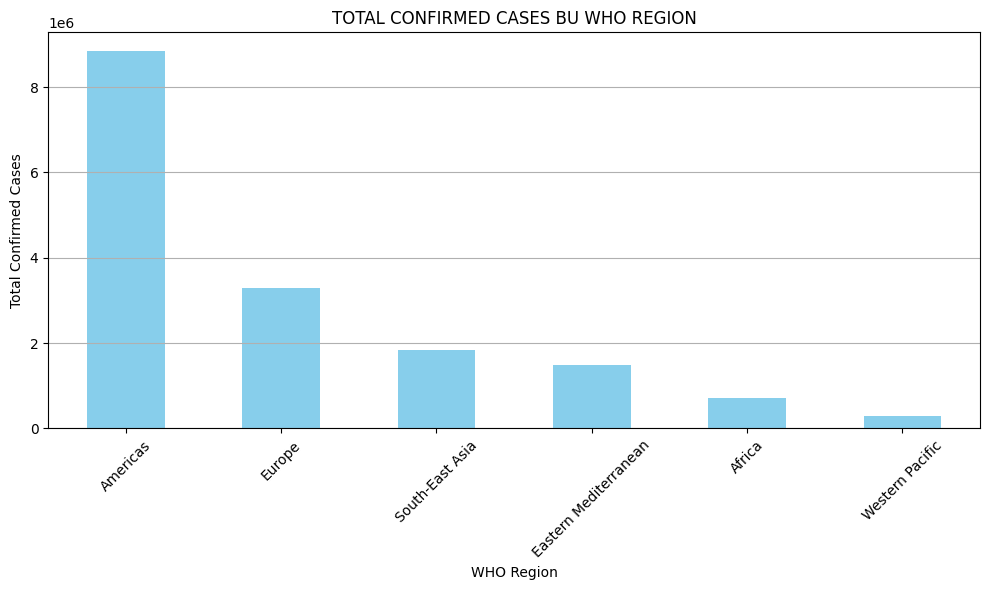

In [27]:
region_Confirmed = df.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False)
plt.figure(figsize = (10,6))
region_Confirmed.plot(kind = "bar",color = "skyblue")
plt.title("TOTAL CONFIRMED CASES BU WHO REGION")
plt.xlabel("WHO Region")
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation=45)
plt.grid(axis = "y")
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9124\4081314376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country/Region",y="Active",data = top10_active,palette = "Reds_r")


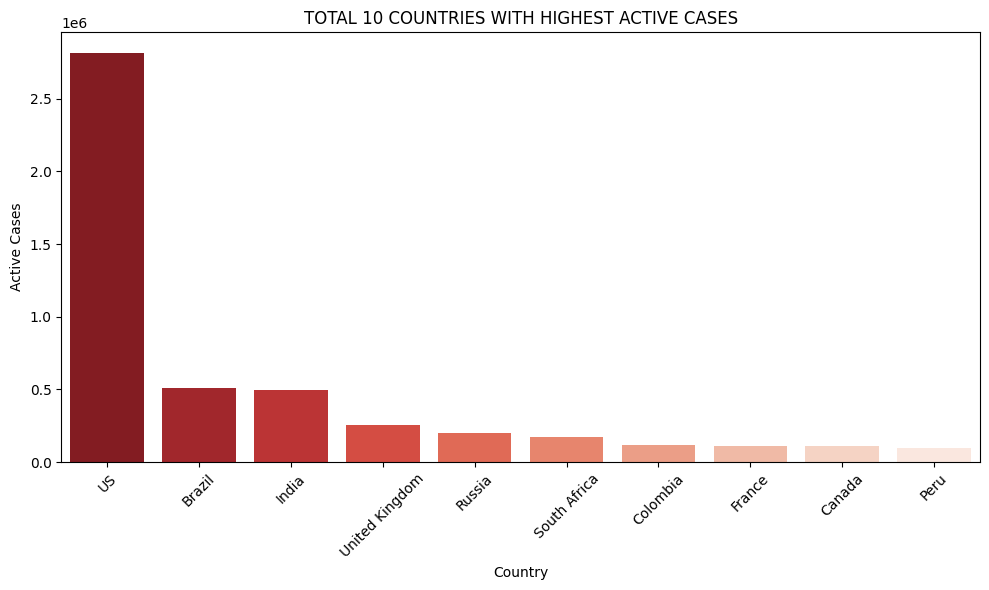

In [28]:
top10_active = df.sort_values(by="Active",ascending=False).head(10)

plt.figure(figsize = (10,6))
sns.barplot(x="Country/Region",y="Active",data = top10_active,palette = "Reds_r")
plt.title("TOTAL 10 COUNTRIES WITH HIGHEST ACTIVE CASES")
plt.xlabel("Country")
plt.ylabel("Active Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

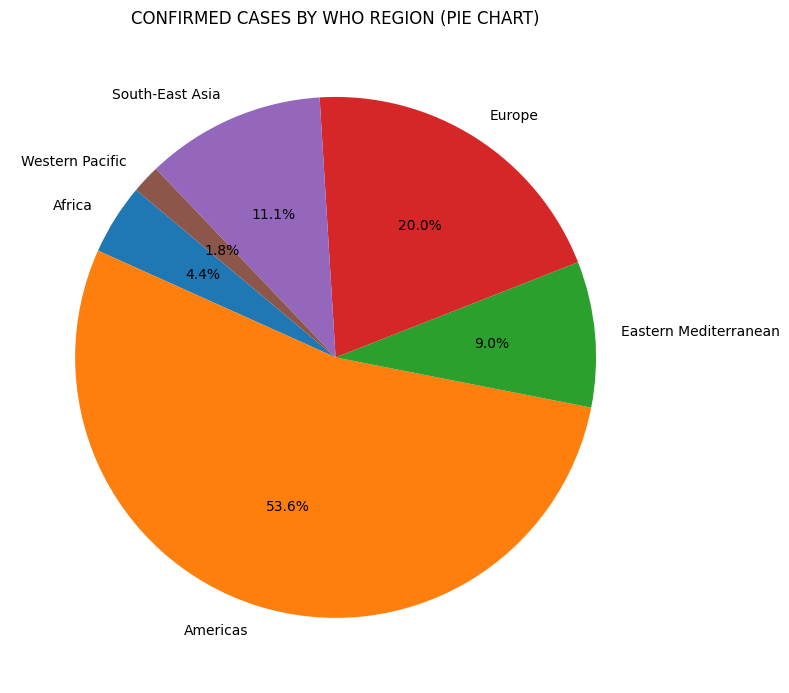

In [29]:
region_cases = df.groupby("WHO Region")["Confirmed"].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_cases, labels=region_cases.index, autopct='%1.1f%%', startangle=140)
plt.title("CONFIRMED CASES BY WHO REGION (PIE CHART)")
plt.tight_layout()
plt.show()

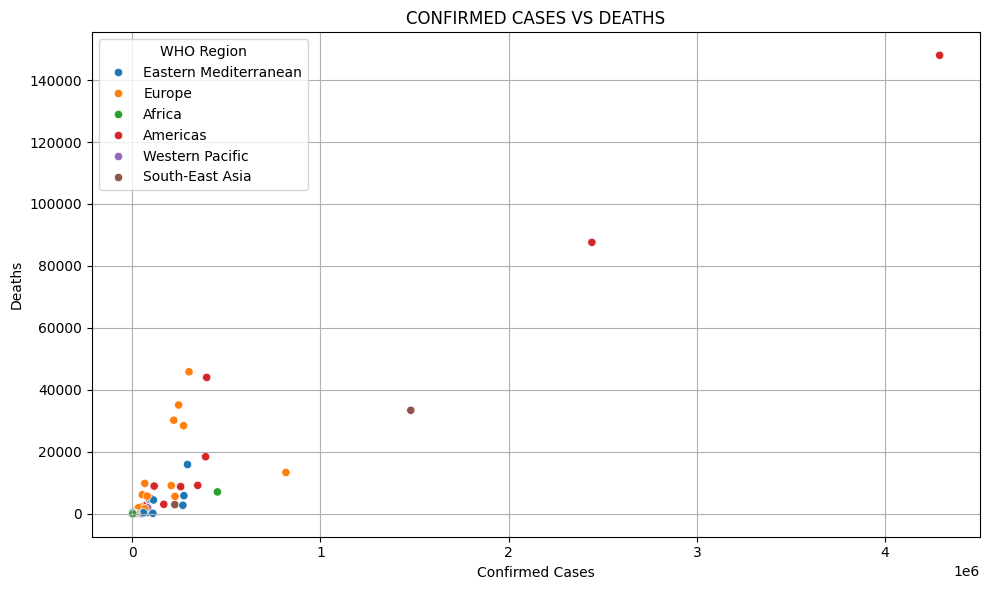

In [30]:
plt.figure(figsize = (10,6))
sns.scatterplot(x="Confirmed",y="Deaths", hue = "WHO Region" , data = df)
plt.title("CONFIRMED CASES VS DEATHS")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

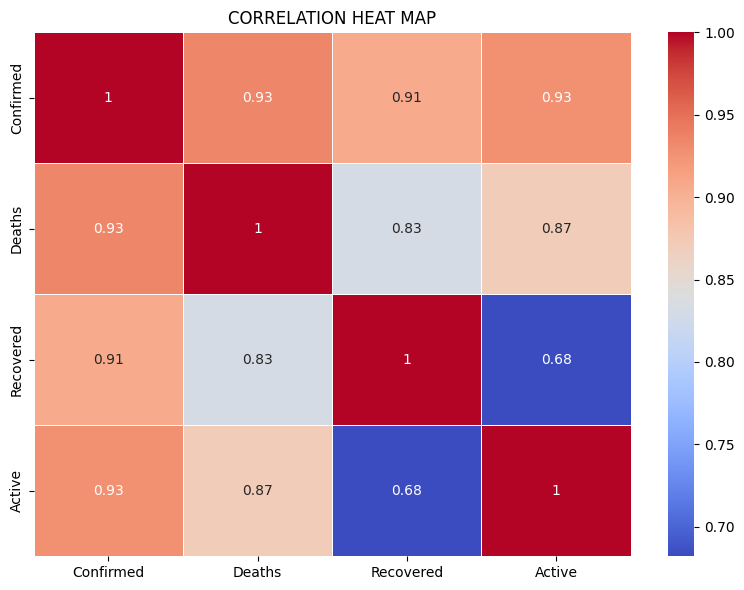

In [31]:
correlation =  df [["Confirmed","Deaths","Recovered","Active"]].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation,annot=True,cmap ="coolwarm",linewidth=0.5)
plt.title("CORRELATION HEAT MAP")
plt.tight_layout()
plt.show()

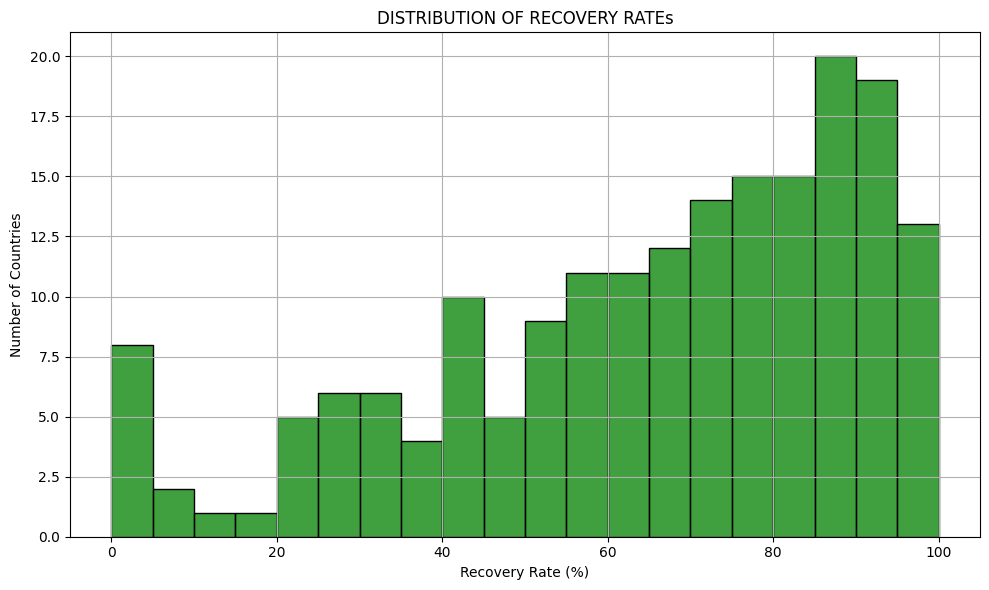

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Recovery Rate"], bins=20, color="green")
plt.title("DISTRIBUTION OF RECOVERY RATEs")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
df["Deaths/100 Cases"] = (df["Deaths"] / df["Confirmed"]) * 100

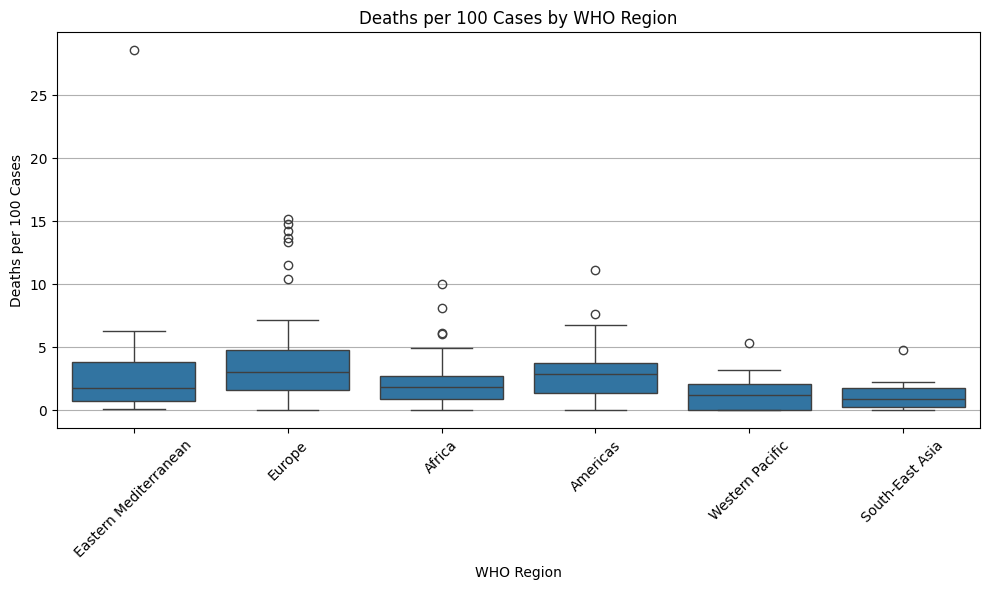

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="WHO Region", y="Deaths/100 Cases", data=df)
plt.title("Deaths per 100 Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Deaths per 100 Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [35]:
if "Confirmed last week" in df.columns and "1 Week change" in df.columns:
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Confirmed last week", y="1 Week change", hue="WHO Region")
    plt.title("WEEKLY COVID CHANGE VS LAST WEEK")
    plt.xlabel("Confirmed last week")
    plt.ylabel("1 Week change")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found: 'Confirmed last week' & '1 Week change'")

Required columns not found: 'Confirmed last week' & '1 Week change'


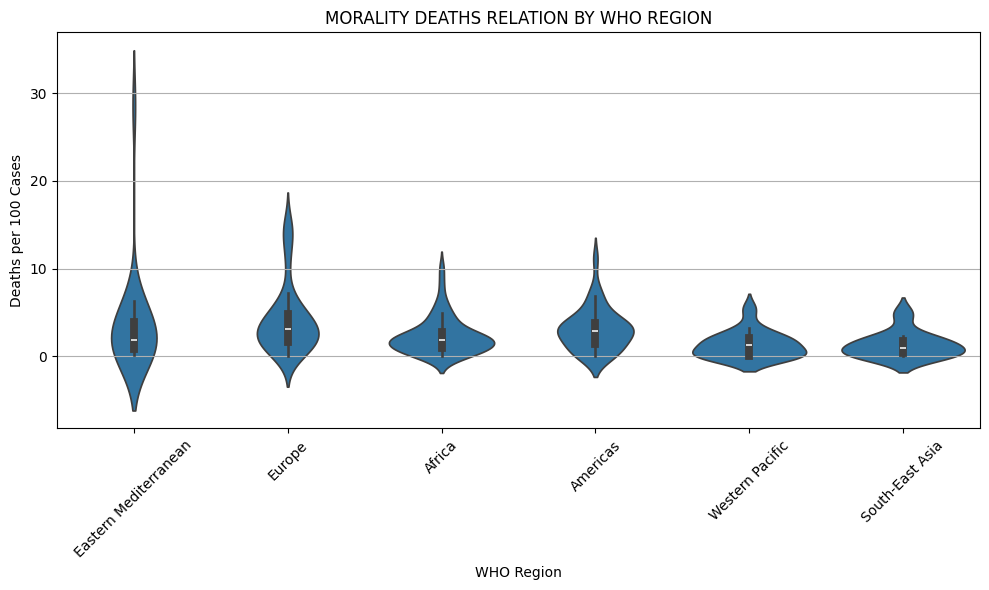

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = df,x="WHO Region", y = "Deaths / 100 Cases")
plt.title("MORALITY DEATHS RELATION BY WHO REGION")
plt.xlabel("WHO Region")
plt.ylabel("Deaths per 100 Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [37]:
pip install dash

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.9 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/7.9 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/7.9 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/7.9 MB 1.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/7.9 MB 1.6 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/7.9 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/7.9 MB 1.8 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/7.9 MB 2.0 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.9 MB 2.1 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/7.9 MB 2.1 MB/s eta 0:00:02
   ------------------------- ----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import dash
print("dash is installed properly")

dash is installed properly


In [39]:
import plotly.express as px
import plotly.graph_objects as go


chart1 = px.bar(df.groupby("WHO Region")["Confirmed"].sum().reset_index(),
                x="WHO Region", y="Confirmed",
                title="Confirmed Cases by WHO Region")


chart2 = px.bar(df.sort_values(by="Active", ascending=False).head(10),
                x="Country/Region", y="Active",
                title="Top 10 Countries with Highest Active Cases")


chart3 = px.pie(df.groupby("WHO Region")["Confirmed"].sum().reset_index(),
                names="WHO Region", values="Confirmed",
                title="Confirmed Cases Distribution by Region")


chart4 = px.scatter(df, x="Confirmed", y="Deaths", color="WHO Region",
                    title="Confirmed Cases vs Deaths")


chart5 = px.histogram(df, x="Recovery Rate", nbins=30,
                      title="Recovery Rate Distribution Across Countries")


chart6 = px.box(df, x="WHO Region", y="Mortality Rate",
                title="Mortality Rate by Region")


correlation = df[["Confirmed", "Deaths", "Recovered", "Active"]].corr()
chart7 = go.Figure(data=go.Heatmap(z=correlation.values,
                                   x=correlation.columns,
                                   y=correlation.columns,
                                   colorscale="Viridis"))
chart7.update_layout(title="Correlation Heatmap of Key Metrics")

chart8 = px.box(df, x="WHO Region", y="Deaths/100 Cases",
                title="Deaths per 100 Cases by Region")



chart9 = px.violin(df, x="WHO Region", y="Mortality Rate", box=True,
                   title="Mortality Rate Violin Plot by Region")


In [41]:
from dash import Dash, html, dcc

# Assuming chart1 to chart9 are defined Plotly figures
app = Dash(__name__)

app.layout = html.Div([
    html.H1("COVID-19 DATA DASHBOARD", style={"textAlign": "center"}),

    dcc.Graph(figure=chart1),
    dcc.Graph(figure=chart2),
    dcc.Graph(figure=chart3),
    dcc.Graph(figure=chart4),
    dcc.Graph(figure=chart5),
    dcc.Graph(figure=chart6),
    dcc.Graph(figure=chart7),
    dcc.Graph(figure=chart8),
    dcc.Graph(figure=chart9),

    html.P("BUILT BY Nikita", style={"textAlign": "center", "marginTop": "20px"})
])

if __name__ == '__main__':
    app.run(debug=True)
